<a href="https://colab.research.google.com/github/KIQVinicius/FIAP-ML/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

df = pd.read_csv('/content/apple_quality.csv')

In [3]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
df['Quality'] = df['Quality'].replace('good', 1)
df['Quality'] = df['Quality'].replace('bad', 0)
df = df.drop('A_id', axis=1)
df = df.drop(df.index[-1])
df.dropna(inplace=True) #Drop nan values

In [5]:
x = df[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness', 'Acidity']]
y = df['Quality']

In [6]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
3995    0.0
3996    1.0
3997    0.0
3998    1.0
3999    1.0
Name: Quality, Length: 4000, dtype: float64

In [7]:
y = y.replace('good', 1)
y = y.replace('bad', 0)

In [8]:
x = x.astype('float32')
y = y.astype('float32')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# 4 | 3 | 2 | 1


nn = keras.Sequential([
  Dense(16, activation='relu', input_shape=[7]),
  Dense(32, activation='relu'),
  Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
nn.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['accuracy'])
#plot_model(nn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
history = nn.fit(X_train_scaled,y_train,epochs = 100, batch_size=32, validation_split=0.3)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

Epoch 1/100
62/62 [==============================] - 2s 6ms/step - loss: 0.6739 - accuracy: 0.6131 - val_loss: 0.6182 - val_accuracy: 0.6849
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.7269 - val_loss: 0.5196 - val_accuracy: 0.7634
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7861 - val_loss: 0.4486 - val_accuracy: 0.8002
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.8137 - val_loss: 0.4044 - val_accuracy: 0.8288
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3991 - accuracy: 0.8198 - val_loss: 0.3778 - val_accuracy: 0.8276
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3737 - accuracy: 0.8285 - val_loss: 0.3596 - val_accuracy: 0.8312
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8372 - val_loss: 0.3438 - val_accuracy: 0.8419
Epoch 8/100
6

array([[9.8744261e-01],
       [2.2927617e-01],
       [5.5417699e-05],
       ...,
       [1.7194542e-01],
       [5.1141720e-02],
       [7.5352467e-03]], dtype=float32)

In [24]:
#prevs = nn.predict(X_train)
for prev in prevs:
  print(prev)

[0.9874426]
[0.22927617]
[5.54177e-05]
[0.14792319]
[5.92398e-07]
[1.2495717e-06]
[0.9999986]
[0.9161987]
[0.99984306]
[0.00021478]
[1.]
[0.01358488]
[8.378197e-05]
[8.985867e-05]
[0.00496399]
[0.7039518]
[0.8523184]
[2.0406532e-08]
[0.00205848]
[0.00554717]
[0.00700933]
[0.99942404]
[0.9999959]
[3.3865712e-05]
[0.5576278]
[0.9581196]
[1.]
[0.9548496]
[0.99799925]
[1.6591016e-06]
[0.96526617]
[1.]
[1.2359687e-11]
[0.01253223]
[0.53663075]
[1.]
[0.5359286]
[2.1047016e-10]
[0.9997538]
[0.00466618]
[0.2083573]
[0.9999999]
[0.1660165]
[1.]
[0.6249298]
[4.670956e-13]
[0.9999056]
[0.9999866]
[0.6972316]
[0.99973315]
[0.00119709]
[0.00056757]
[0.9999998]
[2.6621938e-08]
[2.8342583e-06]
[0.99999917]
[0.88720375]
[0.01866583]
[0.41577914]
[0.9999997]
[0.39127573]
[0.44558418]
[0.9999928]
[0.9999955]
[5.79303e-10]
[0.00286694]
[4.2837507e-07]
[0.9999184]
[5.602703e-07]
[0.3359622]
[0.9987708]
[0.02153067]
[0.9989138]
[2.081822e-05]
[8.971568e-09]
[0.13292935]
[0.9999583]
[0.4455559]
[0.58200145]

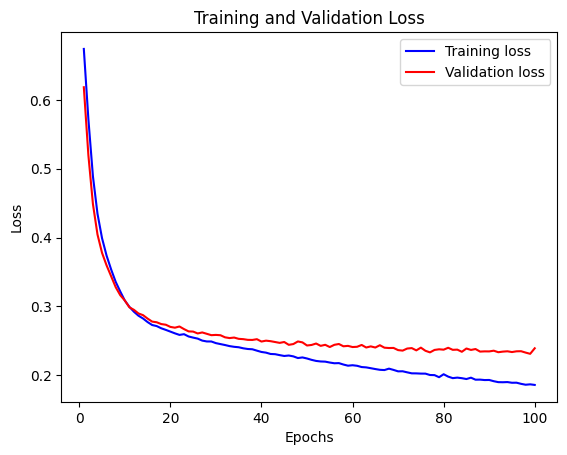

In [18]:
# Plotar curvas de perda
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

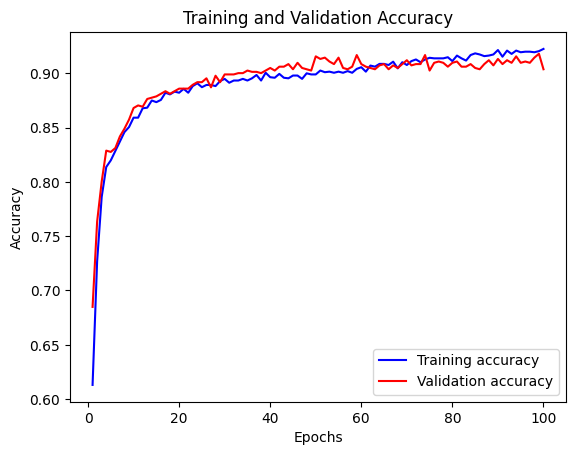

In [21]:
# Plotar curvas de acurácia
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
def ativacao(p):
  if(p>3):
    return 0
  else:
    return 1
prev_treino = []
for prev in prevs:
  prev_treino.append(ativacao(prev))
prev_treino

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [35]:
from sklearn import metrics
acc_treino = metrics.accuracy_score(y_train,prev_treino)
print('Acuracia de Treino',acc_treino*100)

Acuracia de Treino 50.642857142857146


In [36]:

prevst = nn.predict(X_test)
prev_teste = []
for prev in prevst:
  prev_teste.append(ativacao(prev))
prev_teste

38/38 [==============================] - 0s 2ms/step


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,prev_teste)
print(cm)
#sns.heatmap(cm,annot=True)

[[  0 614]
 [  0 586]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prev_teste))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       614
         1.0       0.49      1.00      0.66       586

    accuracy                           0.49      1200
   macro avg       0.24      0.50      0.33      1200
weighted avg       0.24      0.49      0.32      1200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
